In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joypy
from pandas.plotting import table 
from scipy.stats import linregress
from scipy.stats import describe
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [156]:
file = "/Volumes/Music/Data Analysis/My Projects/Loan Application Data/Loan_Application_Data/archive.zip"


In [157]:
df = pd.read_csv(file)


In [158]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


In [159]:
df.dtypes


Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [160]:
# Describe the data
desc_df = df.describe()
desc_df

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [161]:
# How many null values in each column?
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [162]:
# Identifying the different sorts of null values
missing_value = ["NaN", "N/a", "na", "n/a", "n/A", np.nan]
df = pd.read_csv(file, na_values = missing_value)

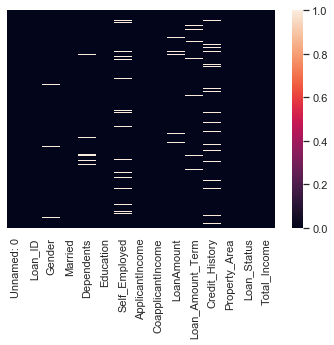

In [163]:
# Plot a heat map showing the null values
sns.heatmap(df.isnull(), yticklabels=False)

In [164]:
# Remove null values
df = df.dropna()
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N,$5754.0
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


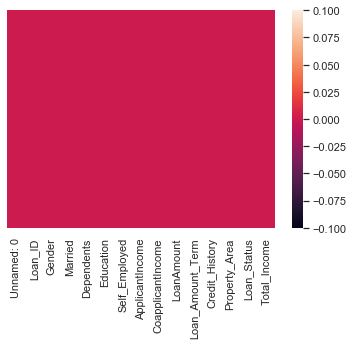

In [165]:
# Plot a heat map verifying the null values are removed
sns.heatmap(df.isnull(), yticklabels=False)

In [166]:
# Determine the number of unique values in each column.
df.nunique()

Unnamed: 0           390
Loan_ID              390
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      333
CoapplicantIncome    190
LoanAmount           164
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
Total_Income         361
dtype: int64

In [167]:
# Look at Total_Income value counts for binning
total_income_val_counts = df['Total_Income'].value_counts()
total_income_val_counts

$3750.0     4
$6277.0     3
$6000.0     3
$4166.0     3
$4583.0     3
           ..
$3846.0     1
$3664.0     1
$15000.0    1
$2995.0     1
$4723.0     1
Name: Total_Income, Length: 361, dtype: int64

In [168]:
# # Choose a cutoff value and create a list of total income types to be replaced
# # use the variable name `total_income_to_replace` 
# total_income_to_replace = list(total_income_val_counts[total_income_val_counts < 2].index)

# # Replace in dataframe
# for inc in total_income_to_replace:
#     df['Total_Income'] = df['Total_Income'].replace(inc,"Other")

# # Check to make sure binning was successful
# df['Total_Income'].value_counts()

In [169]:
# Replace Y's and N's with 1 and 0 for the target variable column Loan_Status
# Using .replace() method
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [170]:
# Convert categorical data to numeric with `pd.get_dummies`
df_dummies = pd.get_dummies(df)
df_dummies

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Total_Income_$9328.0,Total_Income_$9504.0,Total_Income_$9508.0,Total_Income_$9538.0,Total_Income_$9560.0,Total_Income_$9613.0,Total_Income_$9703.0,Total_Income_$9734.0,Total_Income_$9762.0,Total_Income_$9862.0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3000,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2583,2358.0,120.0,360.0,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,6000,0.0,141.0,360.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,5417,4196.0,267.0,360.0,1.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,3597,2157.0,119.0,360.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,495,3326,913.0,105.0,84.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,496,2600,1700.0,107.0,360.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,498,2895,0.0,95.0,360.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# Split our preprocessed data into our features and target arrays
y = df_dummies.Loan_Status
X = df_dummies.drop(columns="Loan_Status")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [172]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [173]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 8
# hidden_nodes_layer3 = 16



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer (added)
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 3)                 2319      
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 2,360
Trainable params: 2,360
Non-trainable params: 0
_________________________________________________________________


In [174]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [175]:
# Since y_train is a Pandas series, we will convert it to a NumPy array using the '.values' attribute
y_train = y_train.values


In [176]:
# Same goes for y_test
y_test = y_test.values


In [177]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, validation_data=(X_test_scaled, y_test))

Train on 292 samples, validate on 98 samples
Epoch 1/100
292/292 [==============================] - 1s 2ms/sample - loss: 0.7545 - accuracy: 0.4349 - val_loss: 0.6783 - val_accuracy: 0.6020
Epoch 2/100
292/292 [==============================] - 0s 124us/sample - loss: 0.7042 - accuracy: 0.5137 - val_loss: 0.6685 - val_accuracy: 0.6327
Epoch 3/100
292/292 [==============================] - 0s 122us/sample - loss: 0.6667 - accuracy: 0.5856 - val_loss: 0.6629 - val_accuracy: 0.6327
Epoch 4/100
292/292 [==============================] - 0s 126us/sample - loss: 0.6357 - accuracy: 0.6370 - val_loss: 0.6582 - val_accuracy: 0.6327
Epoch 5/100
292/292 [==============================] - 0s 129us/sample - loss: 0.6065 - accuracy: 0.6747 - val_loss: 0.6546 - val_accuracy: 0.6327
Epoch 6/100
292/292 [==============================] - 0s 144us/sample - loss: 0.5782 - accuracy: 0.7055 - val_loss: 0.6516 - val_accuracy: 0.6327
Epoch 7/100
292/292 [==============================] - 0s 139us/sample - lo

In [178]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


98/1 - 0s - loss: 1.1484 - accuracy: 0.6429
Loss: 1.301714256101725, Accuracy: 0.6428571343421936


In [179]:
# Train the model and record training history
history = fit_model

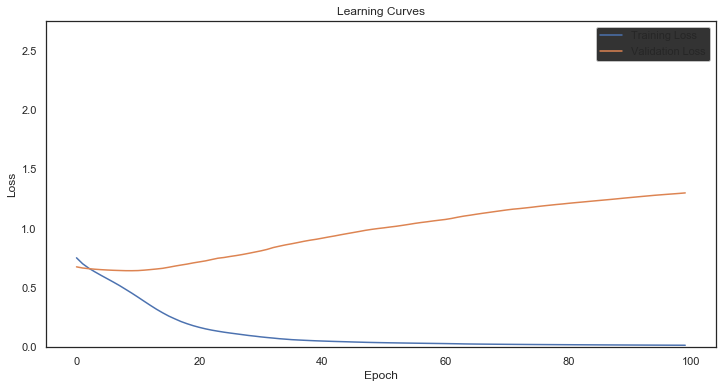

In [180]:
# Plot learning curves to detect overfitting
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.ylim(0,2.75)
plt.legend()
plt.show()

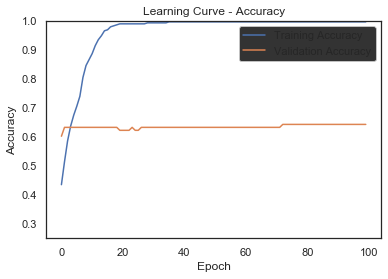

In [181]:
# Plot the learning curve for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.ylim(0.25,1)
plt.legend()
plt.show()

In [182]:
# Predict classes for test set
y_pred = nn.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

In [183]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.svm import SVC

In [184]:
# Define class labels
class_labels = ['Approved', 'Declined']

# Convert y_test to labels
y_test_labels = [class_labels[idx] for idx in y_test]

# Convert y_pred_classes to labels
y_pred_labels = [class_labels[idx] for idx in y_pred_classes]

In [185]:
# Get a count of each disposition to ensure the classes are captured
from collections import Counter

count = Counter(y_test_labels)
count

Counter({'Declined': 63, 'Approved': 35})

In [186]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, labels=class_labels))

Classification Report:
              precision    recall  f1-score   support

    Approved       0.36      1.00      0.53        35
    Declined       0.00      0.00      0.00        63

    accuracy                           0.36        98
   macro avg       0.18      0.50      0.26        98
weighted avg       0.13      0.36      0.19        98



/Users/mdcummings/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdcummings/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdcummings/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf